In [ ]:
#check the direction

In [1]:
import os
print(os.getcwd())

C:\Program Files\Microsoft VS Code


In [2]:
import os

# Change to your project directory (update the path as needed)
os.chdir(r"H:\Regional_Water_Company\For_WR_Report\GWL_BED_Problem")

# Verify the change
print(os.getcwd())

H:\Regional_Water_Company\For_WR_Report\GWL_BED_Problem


In [3]:
import os
print(os.getcwd())

H:\Regional_Water_Company\For_WR_Report\GWL_BED_Problem


In [10]:
import pandas as pd

# Read the Excel file
GWL_Data = pd.read_excel("Data_For_City.xlsx")
# Show the first 5 rows
print(df.head())

    LOCATION          X          Y
0   یکه لنگه  58.860913  36.757687
1  هاشم آباد  59.274253  36.489749
2      نومهن  59.206874  36.687374
3  مومن آباد  58.764284  36.858245
4     موچنان  58.820747  36.881811


In [11]:
GWL_Data

,LOCATION,WATER_TABLE,DATE_GREGORIAN
0,ملی,27.20,2017-02-27
1,ملی,26.51,2017-04-04
2,ملی,26.63,2017-05-16
3,ملی,30.13,2017-06-11
4,ملی,28.25,2017-07-17
...,...,...,...
18885,یکه لنگه,114.78,2022-06-06
18886,یکه لنگه,114.98,2022-07-07
18887,یکه لنگه,115.03,2022-08-01
18888,یکه لنگه,114.85,2022-09-01


In [12]:
import pandas as pd

# Read the Excel file
Loc_points = pd.read_excel("Loc.xlsx")
# Show the first 5 rows
print(df.head())

    LOCATION          X          Y
0   یکه لنگه  58.860913  36.757687
1  هاشم آباد  59.274253  36.489749
2      نومهن  59.206874  36.687374
3  مومن آباد  58.764284  36.858245
4     موچنان  58.820747  36.881811


In [13]:
Loc_points

,LOCATION,X,Y
0,یکه لنگه,58.860913,36.757687
1,هاشم آباد,59.274253,36.489749
2,نومهن,59.206874,36.687374
3,مومن آباد,58.764284,36.858245
4,موچنان,58.820747,36.881811
...,...,...,...
92,اراضی کنه بیست,59.799900,36.321862
93,اراضی قزلکن (شمال غرب سید آباد),58.927522,36.767686
94,اراضی قاسم آباد,59.519148,36.365264
95,اراضی جیم آباد,59.809731,36.110148


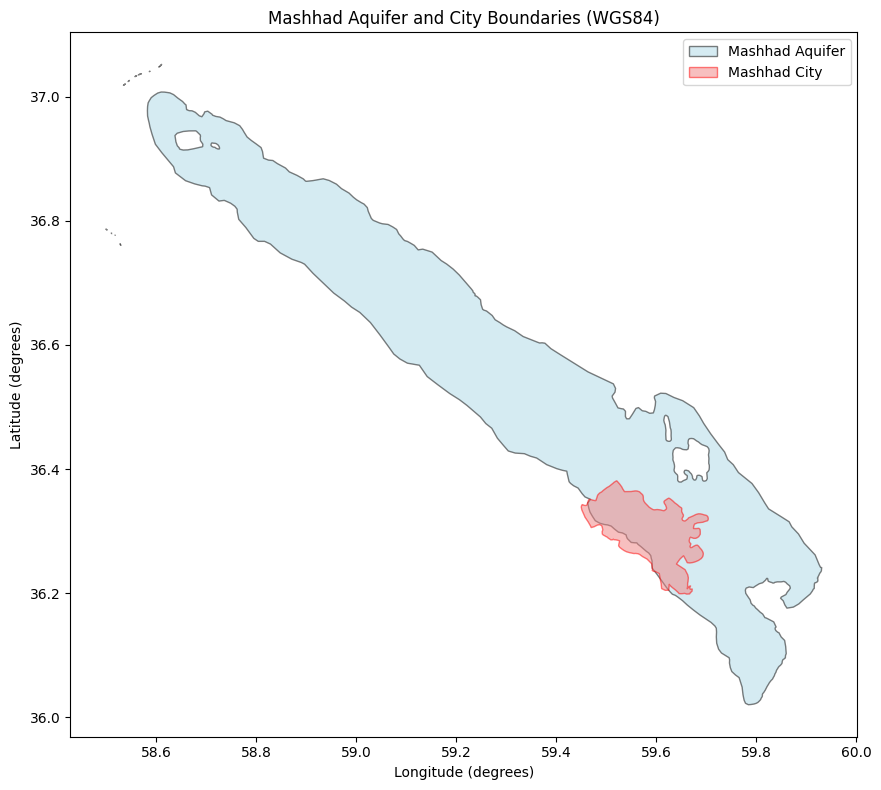

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Load the shapefiles
aquifer_shapefile_path = "AQs/AQs.shp"
city_shapefile_path = "City/City.shp"
gdf_aquifer = gpd.read_file(aquifer_shapefile_path)
gdf_city = gpd.read_file(city_shapefile_path)

# Convert CRS to EPSG:4326 (WGS84, degrees)
gdf_aquifer = gdf_aquifer.to_crs(epsg=4326)
gdf_city = gdf_city.to_crs(epsg=4326)

# Filter for Mashhad
gdf_aquifer_mashhad = gdf_aquifer[gdf_aquifer['Name_AQ'] == 'Mashhad']
gdf_city_mashhad = gdf_city[gdf_city['City_Name'] == 'Mashhad']

# Check if data is empty
if gdf_aquifer_mashhad.empty:
    print("Warning: No 'Mashhad' found in aquifer shapefile 'Name_AQ' column.")
if gdf_city_mashhad.empty:
    print("Warning: No 'Mashhad' found in city shapefile 'City_Name' column.")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot aquifer shapefile
gdf_aquifer_mashhad.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)
gdf_city_mashhad.plot(ax=ax, color='lightcoral', edgecolor='red', alpha=0.5)

# Manually create legend patches
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', alpha=0.5, label='Mashhad Aquifer'),
    Patch(facecolor='lightcoral', edgecolor='red', alpha=0.5, label='Mashhad City')
]

# Add the legend
ax.legend(handles=legend_elements)

# Customize the plot
plt.title('Mashhad Aquifer and City Boundaries (WGS84)')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.tight_layout()

# Show the plot
plt.show()

Groundwater Depth Statistics (Inside Mashhad City):
count    1955.000000
mean       54.161633
std        20.061317
min        15.920000
25%        40.250000
50%        54.960000
75%        64.765000
max        95.633336
Name: WATER_TABLE, dtype: float64

Groundwater Depth Statistics (Outside Mashhad City):
count    16935.000000
mean        59.480704
std         33.487320
min          2.760000
25%         31.400000
50%         59.050000
75%         84.529718
max        173.821898
Name: WATER_TABLE, dtype: float64


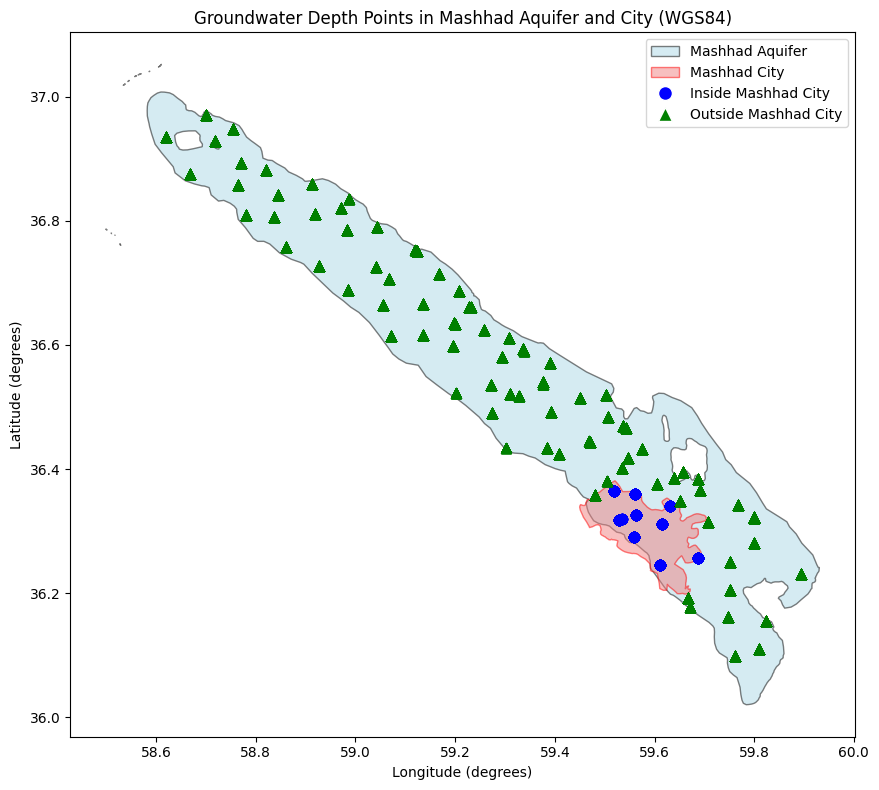

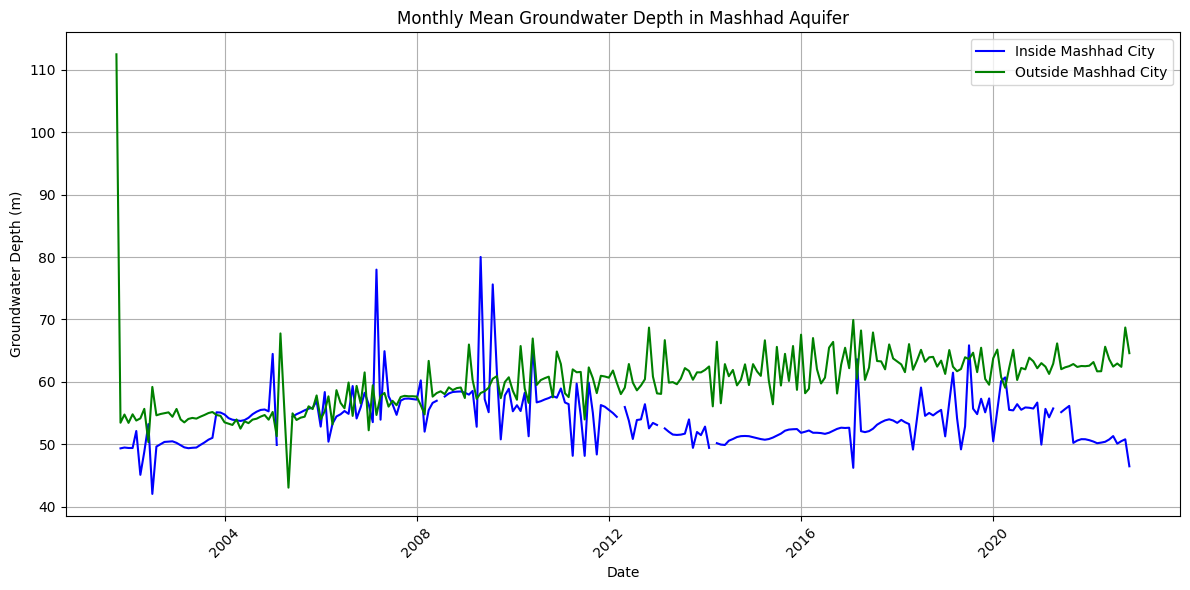

In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Load the shapefiles
aquifer_shapefile_path = "AQs/AQs.shp"
city_shapefile_path = "City/City.shp"
gdf_aquifer = gpd.read_file(aquifer_shapefile_path)
gdf_city = gpd.read_file(city_shapefile_path)

# Convert shapefiles to EPSG:4326 (WGS84, degrees)
gdf_aquifer = gdf_aquifer.to_crs(epsg=4326)
gdf_city = gdf_city.to_crs(epsg=4326)

# Filter for Mashhad
gdf_aquifer_mashhad = gdf_aquifer[gdf_aquifer['Name_AQ'] == 'Mashhad']
gdf_city_mashhad = gdf_city[gdf_city['City_Name'] == 'Mashhad']

# Check if shapefiles are empty
if gdf_aquifer_mashhad.empty:
    print("Warning: No 'Mashhad' found in aquifer shapefile 'Name_AQ' column.")
if gdf_city_mashhad.empty:
    print("Warning: No 'Mashhad' found in city shapefile 'City_Name' column.")

# Load the Excel files
gwl_data = pd.read_excel("Data_For_City.xlsx")
loc_points = pd.read_excel("Loc.xlsx")

# Merge groundwater data with location data
merged_data = pd.merge(gwl_data, loc_points, on='LOCATION', how='inner')

# Create GeoDataFrame from merged data
geometry = [Point(xy) for xy in zip(merged_data['X'], merged_data['Y'])]
gdf_points = gpd.GeoDataFrame(merged_data, geometry=geometry, crs="EPSG:4326")

# Filter points within the Mashhad aquifer
gdf_points_in_aquifer = gpd.sjoin(gdf_points, gdf_aquifer_mashhad, predicate='within', how='inner')

# Classify points as inside or outside Mashhad city
gdf_points_in_aquifer['in_city'] = gdf_points_in_aquifer.geometry.within(gdf_city_mashhad.unary_union)

# Separate inside and outside city points
gdf_inside_city = gdf_points_in_aquifer[gdf_points_in_aquifer['in_city']].copy()
gdf_outside_city = gdf_points_in_aquifer[~gdf_points_in_aquifer['in_city']].copy()

# Analysis: Compute summary statistics
stats_inside = gdf_inside_city['WATER_TABLE'].describe() if not gdf_inside_city.empty else pd.Series()
stats_outside = gdf_outside_city['WATER_TABLE'].describe() if not gdf_outside_city.empty else pd.Series()

print("Groundwater Depth Statistics (Inside Mashhad City):")
print(stats_inside)
print("\nGroundwater Depth Statistics (Outside Mashhad City):")
print(stats_outside)

# Time Series Analysis
# Convert DATE_GREGORIAN to datetime
if not gdf_inside_city.empty:
    gdf_inside_city.loc[:, 'DATE_GREGORIAN'] = pd.to_datetime(gdf_inside_city['DATE_GREGORIAN'])
if not gdf_outside_city.empty:
    gdf_outside_city.loc[:, 'DATE_GREGORIAN'] = pd.to_datetime(gdf_outside_city['DATE_GREGORIAN'])

# Group by month-end and calculate mean groundwater depth
if not gdf_inside_city.empty:
    inside_ts = gdf_inside_city.groupby(pd.Grouper(key='DATE_GREGORIAN', freq='ME'))['WATER_TABLE'].mean().reset_index()
if not gdf_outside_city.empty:
    outside_ts = gdf_outside_city.groupby(pd.Grouper(key='DATE_GREGORIAN', freq='ME'))['WATER_TABLE'].mean().reset_index()

# Plot 1: Spatial Map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot aquifer shapefile
gdf_aquifer_mashhad.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Plot city shapefile
gdf_city_mashhad.plot(ax=ax, color='lightcoral', edgecolor='red', alpha=0.5)

# Plot groundwater points
if not gdf_inside_city.empty:
    gdf_inside_city.plot(ax=ax, marker='o', color='blue', markersize=50, label='Inside Mashhad City')
if not gdf_outside_city.empty:
    gdf_outside_city.plot(ax=ax, marker='^', color='green', markersize=50, label='Outside Mashhad City')

# Create legend for spatial plot
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', alpha=0.5, label='Mashhad Aquifer'),
    Patch(facecolor='lightcoral', edgecolor='red', alpha=0.5, label='Mashhad City')
]
if not gdf_inside_city.empty:
    legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Inside Mashhad City'))
if not gdf_outside_city.empty:
    legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Outside Mashhad City'))

# Add legend to spatial plot
ax.legend(handles=legend_elements)

# Customize spatial plot
plt.title('Groundwater Depth Points in Mashhad Aquifer and City (WGS84)')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.tight_layout()
plt.show()

# Plot 2: Time Series
fig, ax = plt.subplots(figsize=(12, 6))

# Plot time series for inside and outside city
if not gdf_inside_city.empty:
    ax.plot(inside_ts['DATE_GREGORIAN'], inside_ts['WATER_TABLE'], label='Inside Mashhad City', color='blue')
if not gdf_outside_city.empty:
    ax.plot(outside_ts['DATE_GREGORIAN'], outside_ts['WATER_TABLE'], label='Outside Mashhad City', color='green')

# Customize time series plot
plt.title('Monthly Mean Groundwater Depth in Mashhad Aquifer')
plt.xlabel('Date')
plt.ylabel('Groundwater Depth (m)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Load the shapefiles
aquifer_shapefile_path = "AQs/AQs.shp"
city_shapefile_path = "City/City.shp"
gdf_aquifer = gpd.read_file(aquifer_shapefile_path)
gdf_city = gpd.read_file(city_shapefile_path)

# Convert shapefiles to EPSG:4326 (WGS84, degrees)
gdf_aquifer = gdf_aquifer.to_crs(epsg=4326)
gdf_city = gdf_city.to_crs(epsg=4326)

# Filter for Mashhad
gdf_aquifer_mashhad = gdf_aquifer[gdf_aquifer['Name_AQ'] == 'Mashhad']
gdf_city_mashhad = gdf_city[gdf_city['City_Name'] == 'Mashhad']

# Check if shapefiles are empty
if gdf_aquifer_mashhad.empty:
    print("هشدار: 'مشهد' در ستون 'Name_AQ' فایل شیپ آکیفر یافت نشد.")
if gdf_city_mashhad.empty:
    print("هشدار: 'مشهد' در ستون 'City_Name' فایل شیپ شهر یافت نشد.")

# Load the Excel files
gwl_data = pd.read_excel("Data_For_City.xlsx")
loc_points = pd.read_excel("Loc.xlsx")

# Merge groundwater data with location data
merged_data = pd.merge(gwl_data, loc_points, on='LOCATION', how='inner')

# Create GeoDataFrame from merged data
geometry = [Point(xy) for xy in zip(merged_data['X'], merged_data['Y'])]
gdf_points = gpd.GeoDataFrame(merged_data, geometry=geometry, crs="EPSG:4326")

# Filter points within the Mashhad aquifer
gdf_points_in_aquifer = gpd.sjoin(gdf_points, gdf_aquifer_mashhad, predicate='within', how='inner')

# Classify points as inside or outside Mashhad city
gdf_points_in_aquifer['in_city'] = gdf_points_in_aquifer.geometry.within(gdf_city_mashhad.unary_union)

# Separate inside and outside city points
gdf_inside_city = gdf_points_in_aquifer[gdf_points_in_aquifer['in_city']].copy()
gdf_outside_city = gdf_points_in_aquifer[~gdf_points_in_aquifer['in_city']].copy()

# Print names of points inside Mashhad city in Persian
if not gdf_inside_city.empty:
    print("\nنام نقاط داخل شهر مشهد:")
    for location in gdf_inside_city['LOCATION'].unique():
        print(location)
else:
    print("هیچ نقطه‌ای داخل شهر مشهد یافت نشد.")

# Analysis: Compute summary statistics
stats_inside = gdf_inside_city['WATER_TABLE'].describe() if not gdf_inside_city.empty else pd.Series()
stats_outside = gdf_outside_city['WATER_TABLE'].describe() if not gdf_outside_city.empty else pd.Series()

print("\nآمار عمق آب زیرزمینی (داخل شهر مشهد):")
print(stats_inside)
print("\nآمار عمق آب زیرزمینی (خارج از شهر مشهد):")
print(stats_outside)




نام نقاط داخل شهر مشهد:
اراضی قاسم آباد
بحر آباد
بلوار تلویزیون
بلوار جنگل
بلوار راه آهن
بلوارفردوسی
خواجه ربیع
دانشگاه-پارک ملت
قلعه ساختمان
پارک شهر

آمار عمق آب زیرزمینی (داخل شهر مشهد):
count    1955.000000
mean       54.161633
std        20.061317
min        15.920000
25%        40.250000
50%        54.960000
75%        64.765000
max        95.633336
Name: WATER_TABLE, dtype: float64

آمار عمق آب زیرزمینی (خارج از شهر مشهد):
count    16935.000000
mean        59.480704
std         33.487320
min          2.760000
25%         31.400000
50%         59.050000
75%         84.529718
max        173.821898
Name: WATER_TABLE, dtype: float64


In [6]:
import pandas as pd

# Read the Excel file
Data_Clean = pd.read_excel("Data_Clean.xlsx")
# Show the first 5 rows
print(Data_Clean.head())

         lat        lon   1992   1993       1994       1995       1996  \
0  36.098206  59.761354  88.87  88.38  90.037303  90.314052  91.650000   
1  36.110136  59.801812  50.34  50.96  51.913367  52.055166  53.340000   
2  36.149156  59.828758  26.75  26.72  27.360000  27.284804  26.944403   
3  36.160917  59.747949  69.73  71.03  72.000000  71.680000  78.755592   
4  36.173444  59.674010  94.82  91.41  94.558470  94.444000  96.730000   

        1997       1998        1999  ...        2014        2015        2016  \
0  92.720000  94.500000   96.190000  ...  119.530000  121.330000  122.100000   
1  53.248641  55.300000   56.620000  ...   75.410000   77.030000   78.190000   
2  24.250000  24.610000   26.115000  ...   46.800000   47.376461   48.720090   
3  75.961205  74.976216   76.077332  ...  103.320000  106.160000  107.630000   
4  99.430000  98.690000  101.500000  ...  134.205443  136.230084  136.989048   

         2017        2018        2019        2020        2021        2022 

In [7]:
Data_Clean

,lat,lon,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,36.098206,59.761354,88.870000,88.380000,90.037303,90.314052,91.650000,92.720000,94.500000,96.190000,...,119.530000,121.330000,122.100000,124.330000,124.020000,124.750000,125.410000,127.280000,128.580000,129.800000
1,36.110136,59.801812,50.340000,50.960000,51.913367,52.055166,53.340000,53.248641,55.300000,56.620000,...,75.410000,77.030000,78.190000,79.940000,79.122731,79.271204,79.799271,81.429422,82.152138,82.936549
2,36.149156,59.828758,26.750000,26.720000,27.360000,27.284804,26.944403,24.250000,24.610000,26.115000,...,46.800000,47.376461,48.720090,51.639001,46.608571,48.376225,48.829845,48.972648,50.157993,51.139726
3,36.160917,59.747949,69.730000,71.030000,72.000000,71.680000,78.755592,75.961205,74.976216,76.077332,...,103.320000,106.160000,107.630000,107.850000,109.360000,108.705404,109.396031,111.800000,112.140000,112.800000
4,36.173444,59.674010,94.820000,91.410000,94.558470,94.444000,96.730000,99.430000,98.690000,101.500000,...,134.205443,136.230084,136.989048,140.882507,139.694308,141.089076,141.969159,144.496493,146.677300,148.580736
5,36.231061,59.894612,17.470000,17.480000,18.150000,19.394000,19.060000,20.540000,20.550000,21.440000,...,15.710000,14.260000,12.740000,12.420000,12.220000,11.840000,11.289383,11.760000,11.550000,13.620000
6,36.249867,59.750818,46.420000,47.380000,50.020000,50.881556,53.133676,59.640000,59.100000,57.920000,...,67.550000,68.180000,68.570000,69.860000,69.020000,69.840882,70.268137,70.659788,71.087043,71.407484
7,36.253700,59.691332,73.380000,72.600000,73.180000,74.292000,75.550000,74.970000,76.110000,75.340000,...,63.590000,62.480000,61.890000,63.140000,62.920000,64.210000,63.207243,67.740000,69.590000,73.070000
8,36.279979,59.799671,17.300000,17.920000,19.410000,19.118000,19.730000,19.390000,19.390000,16.790000,...,10.340000,9.760000,9.750000,10.400000,9.250000,8.867200,8.100000,8.250000,8.400000,7.910000
9,36.290139,59.558745,52.700000,49.080000,48.978333,49.788000,50.090000,50.543210,49.250000,49.360370,...,48.390000,49.960000,50.910000,51.600000,51.650000,51.730000,49.008333,52.820000,57.450000,59.080000


DataFrame columns: ['lat', 'lon', 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Groundwater Depth Statistics (Inside Mashhad City):
count    256.000000
mean      58.686998
std       27.691402
min       12.617500
25%       43.720000
50%       53.435631
75%       69.085069
max      123.550000
Name: WATER_TABLE, dtype: float64

Groundwater Depth Statistics (Outside Mashhad City):
count    1632.000000
mean       59.835211
std        31.592923
min         3.030000
25%        35.725000
50%        60.475000
75%        80.258912
max       163.421746
Name: WATER_TABLE, dtype: float64


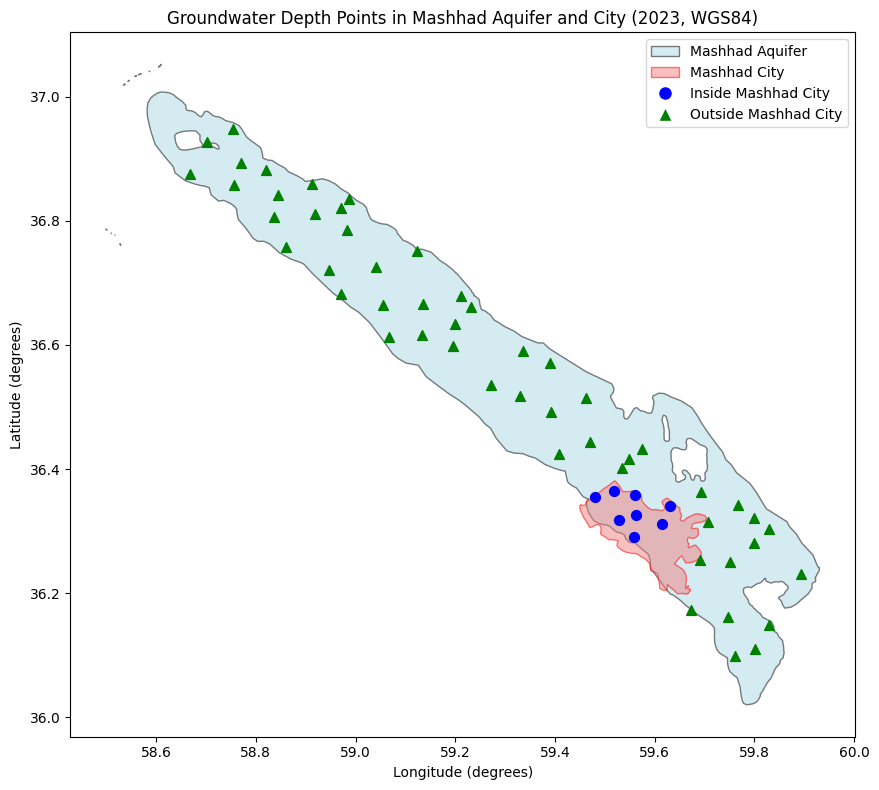

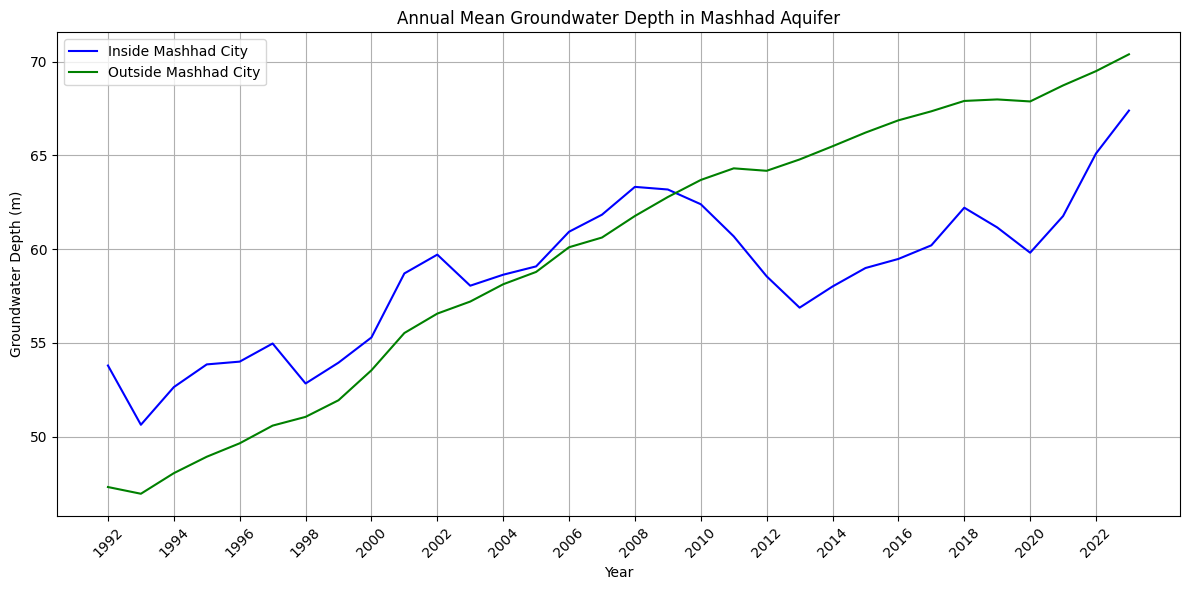

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Load the shapefiles
aquifer_shapefile_path = "AQs/AQs.shp"
city_shapefile_path = "City/City.shp"
gdf_aquifer = gpd.read_file(aquifer_shapefile_path)
gdf_city = gpd.read_file(city_shapefile_path)

# Convert shapefiles to EPSG:4326 (WGS84, degrees)
gdf_aquifer = gdf_aquifer.to_crs(epsg=4326)
gdf_city = gdf_city.to_crs(epsg=4326)

# Filter for Mashhad
gdf_aquifer_mashhad = gdf_aquifer[gdf_aquifer['Name_AQ'] == 'Mashhad']
gdf_city_mashhad = gdf_city[gdf_city['City_Name'] == 'Mashhad']

# Check if shapefiles are empty
if gdf_aquifer_mashhad.empty:
    print("Warning: No 'Mashhad' found in aquifer shapefile 'Name_AQ' column.")
if gdf_city_mashhad.empty:
    print("Warning: No 'Mashhad' found in city shapefile 'City_Name' column.")

# Load the new data
data_clean = pd.read_excel("Data_Clean.xlsx")

# Print column names for debugging
print("DataFrame columns:", data_clean.columns.tolist())

# Identify year columns (assuming they are numeric or string years)
year_columns = [col for col in data_clean.columns if col not in ['lat', 'lon'] and str(col).isdigit()]
if not year_columns:
    raise ValueError("No year columns found in the DataFrame. Please check column names.")

# Reshape data from wide to long format
data_long = pd.melt(
    data_clean,
    id_vars=['lat', 'lon'],
    value_vars=year_columns,
    var_name='year',
    value_name='WATER_TABLE'
)

# Convert year to integer
data_long['year'] = data_long['year'].astype(int)

# Create GeoDataFrame from data
geometry = [Point(xy) for xy in zip(data_long['lon'], data_long['lat'])]
gdf_points = gpd.GeoDataFrame(data_long, geometry=geometry, crs="EPSG:4326")

# Filter points within the Mashhad aquifer
gdf_points_in_aquifer = gpd.sjoin(gdf_points, gdf_aquifer_mashhad, predicate='within', how='inner')

# Classify points as inside or outside Mashhad city
gdf_points_in_aquifer['in_city'] = gdf_points_in_aquifer.geometry.within(gdf_city_mashhad.unary_union)

# Separate inside and outside city points
gdf_inside_city = gdf_points_in_aquifer[gdf_points_in_aquifer['in_city']].copy()
gdf_outside_city = gdf_points_in_aquifer[~gdf_points_in_aquifer['in_city']].copy()

# Analysis: Compute summary statistics
stats_inside = gdf_inside_city['WATER_TABLE'].describe() if not gdf_inside_city.empty else pd.Series()
stats_outside = gdf_outside_city['WATER_TABLE'].describe() if not gdf_outside_city.empty else pd.Series()

print("Groundwater Depth Statistics (Inside Mashhad City):")
print(stats_inside)
print("\nGroundwater Depth Statistics (Outside Mashhad City):")
print(stats_outside)

# Time Series Analysis: Group by year and calculate mean groundwater depth
if not gdf_inside_city.empty:
    inside_ts = gdf_inside_city.groupby('year')['WATER_TABLE'].mean().reset_index()
if not gdf_outside_city.empty:
    outside_ts = gdf_outside_city.groupby('year')['WATER_TABLE'].mean().reset_index()

# Plot 1: Spatial Map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot aquifer shapefile
gdf_aquifer_mashhad.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Plot city shapefile
gdf_city_mashhad.plot(ax=ax, color='lightcoral', edgecolor='red', alpha=0.5)

# Plot groundwater points (using the latest year's data for visualization)
latest_year = max(year_columns, key=int) if year_columns else 2023
if not gdf_inside_city.empty:
    gdf_inside_latest = gdf_inside_city[gdf_inside_city['year'] == int(latest_year)]
    gdf_inside_latest.plot(ax=ax, marker='o', color='blue', markersize=50, label='Inside Mashhad City')
if not gdf_outside_city.empty:
    gdf_outside_latest = gdf_outside_city[gdf_outside_city['year'] == int(latest_year)]
    gdf_outside_latest.plot(ax=ax, marker='^', color='green', markersize=50, label='Outside Mashhad City')

# Create legend for spatial plot
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', alpha=0.5, label='Mashhad Aquifer'),
    Patch(facecolor='lightcoral', edgecolor='red', alpha=0.5, label='Mashhad City')
]
if not gdf_inside_city.empty:
    legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Inside Mashhad City'))
if not gdf_outside_city.empty:
    legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Outside Mashhad City'))

# Add legend to spatial plot
ax.legend(handles=legend_elements)

# Customize spatial plot
plt.title(f'Groundwater Depth Points in Mashhad Aquifer and City ({latest_year}, WGS84)')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.tight_layout()
plt.show()

# Plot 2: Time Series
fig, ax = plt.subplots(figsize=(12, 6))

# Plot time series for inside and outside city
if not gdf_inside_city.empty:
    ax.plot(inside_ts['year'], inside_ts['WATER_TABLE'], label='Inside Mashhad City', color='blue')
if not gdf_outside_city.empty:
    ax.plot(outside_ts['year'], outside_ts['WATER_TABLE'], label='Outside Mashhad City', color='green')

# Customize time series plot
plt.title('Annual Mean Groundwater Depth in Mashhad Aquifer')
plt.xlabel('Year')
plt.ylabel('Groundwater Depth (m)')
plt.grid(True)
plt.legend()
plt.xticks(range(min(int(col) for col in year_columns), max(int(col) for col in year_columns) + 1, 2), rotation=45)
plt.tight_layout()
plt.show()

DataFrame columns: ['lat', 'lon', 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Groundwater Depth Statistics (Inside Mashhad City):
count    256.000000
mean      58.686998
std       27.691402
min       12.617500
25%       43.720000
50%       53.435631
75%       69.085069
max      123.550000
Name: WATER_TABLE, dtype: float64

Groundwater Depth Statistics (Outside Mashhad City):
count    1632.000000
mean       59.835211
std        31.592923
min         3.030000
25%        35.725000
50%        60.475000
75%        80.258912
max       163.421746
Name: WATER_TABLE, dtype: float64


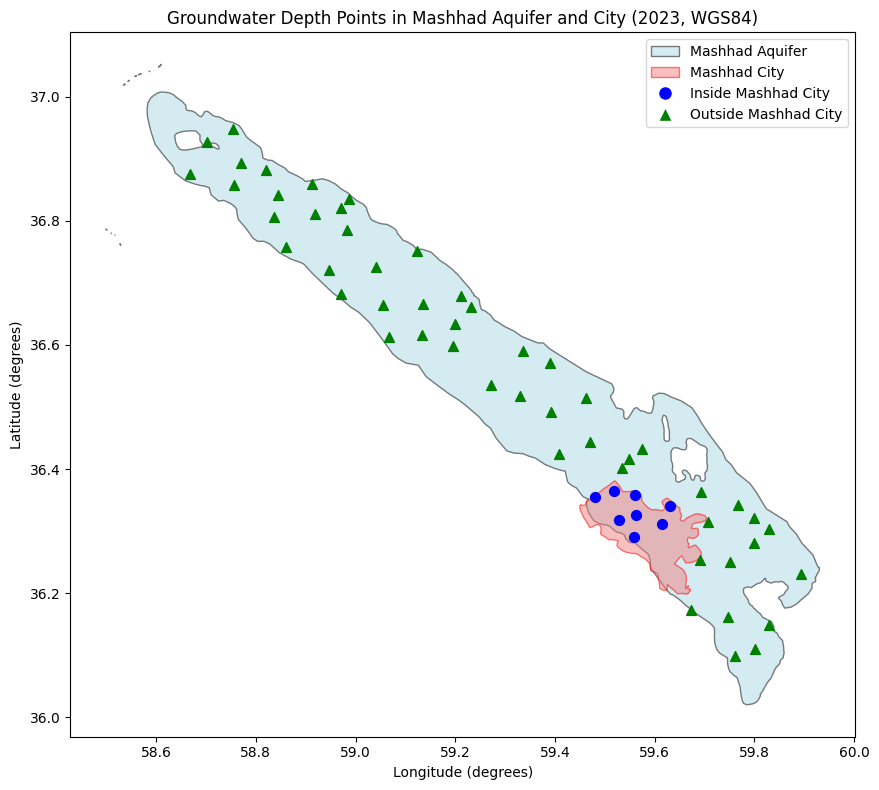

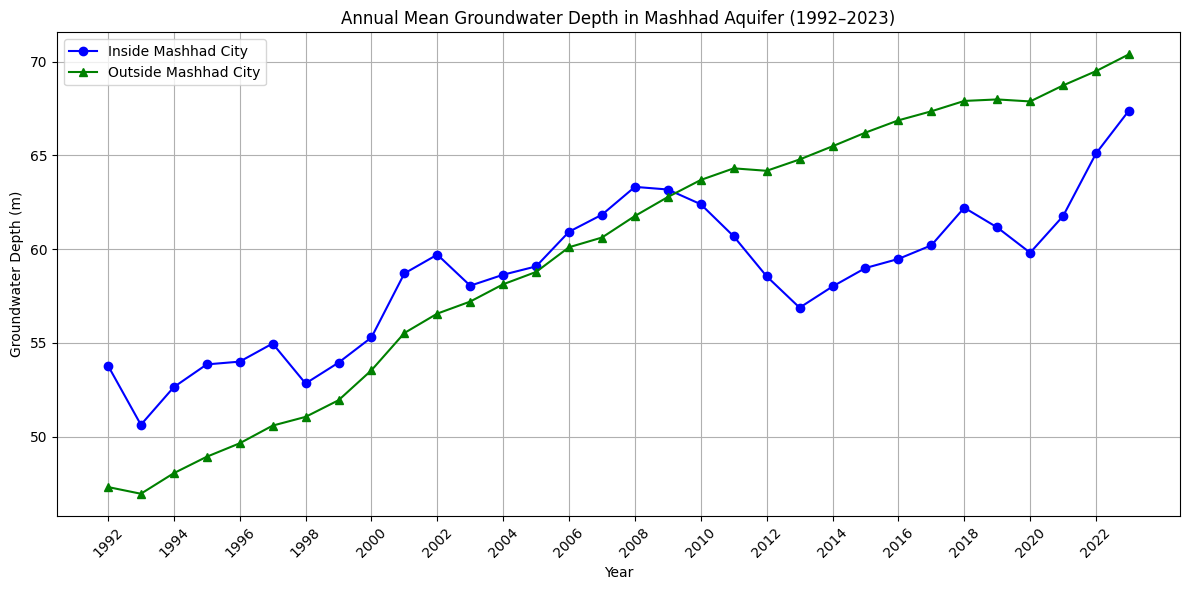

In [24]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Load the shapefiles
aquifer_shapefile_path = "AQs/AQs.shp"
city_shapefile_path = "City/City.shp"
gdf_aquifer = gpd.read_file(aquifer_shapefile_path)
gdf_city = gpd.read_file(city_shapefile_path)

# Convert shapefiles to EPSG:4326 (WGS84, degrees)
gdf_aquifer = gdf_aquifer.to_crs(epsg=4326)
gdf_city = gdf_city.to_crs(epsg=4326)

# Filter for Mashhad
gdf_aquifer_mashhad = gdf_aquifer[gdf_aquifer['Name_AQ'] == 'Mashhad']
gdf_city_mashhad = gdf_city[gdf_city['City_Name'] == 'Mashhad']

# Check if shapefiles are empty
if gdf_aquifer_mashhad.empty:
    print("Warning: No 'Mashhad' found in aquifer shapefile 'Name_AQ' column.")
if gdf_city_mashhad.empty:
    print("Warning: No 'Mashhad' found in city shapefile 'City_Name' column.")

# Load the new data
data_clean = pd.read_excel("Data_Clean.xlsx")

# Print column names for debugging
print("DataFrame columns:", data_clean.columns.tolist())

# Identify year columns (assuming they are numeric or string years)
year_columns = [col for col in data_clean.columns if col not in ['lat', 'lon'] and str(col).isdigit()]
if not year_columns:
    raise ValueError("No year columns found in the DataFrame. Please check column names.")

# Reshape data from wide to long format
data_long = pd.melt(
    data_clean,
    id_vars=['lat', 'lon'],
    value_vars=year_columns,
    var_name='year',
    value_name='WATER_TABLE'
)

# Convert year to integer
data_long['year'] = data_long['year'].astype(int)

# Check for missing data in WATER_TABLE
missing_data = data_long['WATER_TABLE'].isna().sum()
if missing_data > 0:
    print(f"Warning: {missing_data} missing WATER_TABLE values detected.")

# Create GeoDataFrame from data
geometry = [Point(xy) for xy in zip(data_long['lon'], data_long['lat'])]
gdf_points = gpd.GeoDataFrame(data_long, geometry=geometry, crs="EPSG:4326")

# Filter points within the Mashhad aquifer
gdf_points_in_aquifer = gpd.sjoin(gdf_points, gdf_aquifer_mashhad, predicate='within', how='inner')

# Classify points as inside or outside Mashhad city
gdf_points_in_aquifer['in_city'] = gdf_points_in_aquifer.geometry.within(gdf_city_mashhad.unary_union)

# Separate inside and outside city points
gdf_inside_city = gdf_points_in_aquifer[gdf_points_in_aquifer['in_city']].copy()
gdf_outside_city = gdf_points_in_aquifer[~gdf_points_in_aquifer['in_city']].copy()

# Analysis: Compute summary statistics
stats_inside = gdf_inside_city['WATER_TABLE'].describe() if not gdf_inside_city.empty else pd.Series()
stats_outside = gdf_outside_city['WATER_TABLE'].describe() if not gdf_outside_city.empty else pd.Series()

print("Groundwater Depth Statistics (Inside Mashhad City):")
print(stats_inside)
print("\nGroundwater Depth Statistics (Outside Mashhad City):")
print(stats_outside)

# Time Series Analysis: Group by year and calculate mean groundwater depth
if not gdf_inside_city.empty:
    inside_ts = gdf_inside_city.groupby('year')['WATER_TABLE'].mean().reset_index()
    if inside_ts['WATER_TABLE'].isna().any():
        print("Warning: Missing mean groundwater depth values for some years (Inside Mashhad City).")
if not gdf_outside_city.empty:
    outside_ts = gdf_outside_city.groupby('year')['WATER_TABLE'].mean().reset_index()
    if outside_ts['WATER_TABLE'].isna().any():
        print("Warning: Missing mean groundwater depth values for some years (Outside Mashhad City).")

# Plot 1: Spatial Map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot aquifer shapefile
gdf_aquifer_mashhad.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Plot city shapefile
gdf_city_mashhad.plot(ax=ax, color='lightcoral', edgecolor='red', alpha=0.5)

# Plot groundwater points (using the latest year's data for visualization)
latest_year = max(year_columns, key=int) if year_columns else 2023
if not gdf_inside_city.empty:
    gdf_inside_latest = gdf_inside_city[gdf_inside_city['year'] == int(latest_year)]
    gdf_inside_latest.plot(ax=ax, marker='o', color='blue', markersize=50, label='Inside Mashhad City')
if not gdf_outside_city.empty:
    gdf_outside_latest = gdf_outside_city[gdf_outside_city['year'] == int(latest_year)]
    gdf_outside_latest.plot(ax=ax, marker='^', color='green', markersize=50, label='Outside Mashhad City')

# Create legend for spatial plot
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', alpha=0.5, label='Mashhad Aquifer'),
    Patch(facecolor='lightcoral', edgecolor='red', alpha=0.5, label='Mashhad City')
]
if not gdf_inside_city.empty:
    legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Inside Mashhad City'))
if not gdf_outside_city.empty:
    legend_elements.append(Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Outside Mashhad City'))

# Add legend to spatial plot
ax.legend(handles=legend_elements)

# Customize spatial plot
plt.title(f'Groundwater Depth Points in Mashhad Aquifer and City ({latest_year}, WGS84)')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.tight_layout()
plt.show()

# Plot 2: Annual Time Series
fig, ax = plt.subplots(figsize=(12, 6))

# Plot time series for inside and outside city
if not gdf_inside_city.empty:
    ax.plot(inside_ts['year'], inside_ts['WATER_TABLE'], label='Inside Mashhad City', color='blue', marker='o')
if not gdf_outside_city.empty:
    ax.plot(outside_ts['year'], outside_ts['WATER_TABLE'], label='Outside Mashhad City', color='green', marker='^')

# Customize time series plot
plt.title('Annual Mean Groundwater Depth in Mashhad Aquifer (1992–2023)')
plt.xlabel('Year')
plt.ylabel('Groundwater Depth (m)')
plt.grid(True)
plt.legend()
plt.xticks(range(min(int(col) for col in year_columns), max(int(col) for col in year_columns) + 1, 2), rotation=45)
plt.tight_layout()
plt.show()

In [8]:
import netCDF4 as nc
import numpy as np

# Path to your NetCDF file
file_path = "Sub_Mashhad.nc"

# Open the NetCDF file
dataset = nc.Dataset(file_path, mode='r')

# Print the file's metadata (dimensions, variables, global attributes)
print("NetCDF File Metadata:")
print(dataset)

# List all dimensions
print("\nDimensions:")
for dim in dataset.dimensions:
    print(f"{dim}: {len(dataset.dimensions[dim])}")

# List all variables
print("\nVariables:")
for var in dataset.variables:
    print(f"{var}: {dataset.variables[var].shape}, {dataset.variables[var].dtype}")



NetCDF File Metadata:
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(197), lat(1238), lon(1712)
    variables(dimensions): int64 time(time), float64 lat(lat), float64 lon(lon), float32 cum(time, lat, lon)
    groups: 

Dimensions:
time: 197
lat: 1238
lon: 1712

Variables:
time: (197,), int64
lat: (1238,), float64
lon: (1712,), float64
cum: (197, 1238, 1712), float32


In [10]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Read groundwater data
try:
    groundwater_data = pd.read_excel("Data_Clean.xlsx")
except FileNotFoundError:
    print("Error: 'Data_Clean.xlsx' not found. Please ensure the file is in the correct directory.")
    exit()

# Convert column names to strings
groundwater_data.columns = [str(col) for col in groundwater_data.columns]
print("Available columns in groundwater data:", groundwater_data.columns.tolist())

# Calculate groundwater depth changes relative to 1993
base_year = '1993'
if base_year not in groundwater_data.columns:
    print(f"Error: Base year {base_year} not found in groundwater data columns.")
    exit()

groundwater_changes = groundwater_data.copy()
for year in range(1993, 2024):
    year_str = str(year)
    if year_str in groundwater_data.columns:
        groundwater_changes[year_str] = groundwater_data[year_str] - groundwater_data[base_year]
    else:
        print(f"Warning: Year {year_str} not found in groundwater data. Skipping.")
        groundwater_changes[year_str] = np.nan

# Keep only relevant columns (lat, lon, and years)
available_years = [str(year) for year in range(1993, 2024) if str(year) in groundwater_changes.columns]
columns_to_keep = ['lat', 'lon'] + available_years
try:
    groundwater_changes = groundwater_changes[columns_to_keep]
except KeyError as e:
    print(f"Error: Some columns not found: {e}")
    print("Available columns:", groundwater_changes.columns.tolist())
    exit()

# Read subsidence data
try:
    subsidence_data = xr.open_dataset("Sub_Mashhad.nc")
except FileNotFoundError:
    print("Error: 'Sub_Mashhad.nc' not found. Please ensure the file is in the correct directory.")
    exit()

# Verify time variable is in datetime format
if not np.issubdtype(subsidence_data['time'].dtype, np.datetime64):
    print("Warning: Time variable is not in datetime format. Attempting to convert to datetime.")
    try:
        subsidence_data['time'] = pd.to_datetime(subsidence_data['time'].values)
    except Exception as e:
        print(f"Error converting time to datetime: {e}")
        exit()
else:
    print("Time variable is already in datetime format.")

# Function to extract last subsidence value of each month for each year
def get_monthly_subsidence(subsidence_data, start_year=2015, end_year=2023):
    monthly_subsidence = []
    points = groundwater_data[['lat', 'lon']].values
    
    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            month_data = subsidence_data.sel(
                time=(subsidence_data.time.dt.year == year) & 
                     (subsidence_data.time.dt.month == month)
            )
            if len(month_data.time) > 0:
                last_time = month_data.time.values[-1]
                last_data = month_data.sel(time=last_time)
                
                point_values = []
                for lat, lon in points:
                    lat_idx = np.abs(last_data.lat - lat).argmin()
                    lon_idx = np.abs(last_data.lon - lon).argmin()
                    value = last_data['cum'].isel(lat=lat_idx, lon=lon_idx).values
                    # Keep original units (negative mm)
                    point_values.append(float(value) if not np.isnan(value) else np.nan)
                
                monthly_subsidence.append({
                    'year': year,
                    'month': month,
                    'subsidence': point_values
                })
    
    return monthly_subsidence

# Get monthly subsidence data
monthly_subsidence = get_monthly_subsidence(subsidence_data)

# Create DataFrame for monthly___

# Create DataFrame for monthly subsidence
monthly_subsidence_df = pd.DataFrame({
    'year': [entry['year'] for entry in monthly_subsidence],
    'month': [entry['month'] for entry in monthly_subsidence]
})
for i in range(len(groundwater_data)):
    monthly_subsidence_df[f'point_{i}'] = [entry['subsidence'][i] for entry in monthly_subsidence]

# Extract annual subsidence (last recorded value of the year)
annual_subsidence = []
for year in range(2015, 2024):
    year_data = monthly_subsidence_df[monthly_subsidence_df['year'] == year]
    if not year_data.empty:
        last_month = year_data['month'].max()
        last_data = year_data[year_data['month'] == last_month].iloc[0]
        annual_subsidence.append({
            'year': year,
            **{f'point_{i}': last_data[f'point_{i}'] for i in range(len(groundwater_data))}
        })

annual_subsidence_df = pd.DataFrame(annual_subsidence)

# Calculate correlations and include last depth change
correlations = []
for i in range(len(groundwater_data)):
    gw_values = groundwater_changes[[str(year) for year in range(2015, 2024)]].iloc[i].values
    sub_values = annual_subsidence_df[f'point_{i}'].values.flatten()
    last_depth_change = groundwater_changes['2023'].iloc[i] if '2023' in groundwater_changes.columns else np.nan
    
    if len(gw_values) == len(sub_values) and not np.any(np.isnan(gw_values)) and not np.any(np.isnan(sub_values)):
        corr, _ = pearsonr(gw_values, sub_values)
        correlations.append({
            'point': i,
            'lat': groundwater_changes['lat'].iloc[i],
            'lon': groundwater_changes['lon'].iloc[i],
            'correlation': corr,
            'last_depth_change_m': last_depth_change
        })
    else:
        correlations.append({
            'point': i,
            'lat': groundwater_changes['lat'].iloc[i],
            'lon': groundwater_changes['lon'].iloc[i],
            'correlation': np.nan,
            'last_depth_change_m': last_depth_change
        })

correlation_df = pd.DataFrame(correlations)

# Plot for each point (twin y-axes time series and scatter plot)
for i in range(len(groundwater_data)):
    # Twin-axis time series plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot groundwater drawdown (right y-axis)
    gw_point = groundwater_changes[[str(year) for year in range(1993, 2024)]].iloc[i].values
    ax2 = ax1.twinx()
    ax2.plot(range(1993, 2024), gw_point, label='Groundwater Drawdown (m)', color='blue')
    ax2.set_ylabel('Groundwater Drawdown (m)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # Plot subsidence (left y-axis)
    sub_point = annual_subsidence_df[f'point_{i}'].values
    ax1.plot(range(2015, 2024), sub_point, label='Subsidence (mm)', color='red')
    ax1.set_ylabel('Subsidence (mm)', color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    
    ax1.set_xlabel('Year')
    plt.title(f'Point {i} (Lat: {groundwater_changes["lat"].iloc[i]:.4f}, Lon: {groundwater_changes["lon"].iloc[i]:.4f})')
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
    
    plt.grid(True)
    plt.savefig(f'point_{i}_timeseries_plot.png')
    plt.close()
    
    # Scatter plot (Depth vs. Subsidence)
    fig, ax = plt.subplots(figsize=(8, 6))
    gw_values = groundwater_changes[[str(year) for year in range(2015, 2024)]].iloc[i].values
    sub_values = annual_subsidence_df[f'point_{i}'].values
    corr = correlation_df['correlation'].iloc[i]
    
    ax.scatter(gw_values, sub_values, color='purple')
    ax.set_xlabel('Groundwater Drawdown (m)')
    ax.set_ylabel('Subsidence (mm)')
    ax.set_title(f'Point {i} (Lat: {groundwater_changes["lat"].iloc[i]:.4f}, Lon: {groundwater_changes["lon"].iloc[i]:.4f})\nCorrelation: {corr:.3f}')
    ax.grid(True)
    plt.savefig(f'point_{i}_scatter_plot.png')
    plt.close()

# Save results
groundwater_changes.to_csv('groundwater_changes.csv', index=False)
annual_subsidence_df.to_csv('annual_subsidence.csv', index=False)
correlation_df.to_csv('correlation_results.csv', index=False)

print("Analysis complete. Results saved to 'groundwater_changes.csv', 'annual_subsidence.csv', and 'correlation_results.csv'.")
print(f"Time series plots saved as 'point_<i>_timeseries_plot.png' and scatter plots as 'point_<i>_scatter_plot.png' for each point.")
print(f"Average correlation: {correlation_df['correlation'].mean():.3f}")

Available columns in groundwater data: ['lat', 'lon', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
Time variable is already in datetime format.
Analysis complete. Results saved to 'groundwater_changes.csv', 'annual_subsidence.csv', and 'correlation_results.csv'.
Time series plots saved as 'point_<i>_timeseries_plot.png' and scatter plots as 'point_<i>_scatter_plot.png' for each point.
Average correlation: -0.274


In [12]:
import pandas as pd

# Read the Excel file
Data_Clean_monthly = pd.read_excel("Clean_Data_monthly.xlsx")
# Show the first 5 rows
print(Data_Clean_monthly.head())

   ID_Well         W1         W2         W3         W4         W5         W8  \
0      Lat  36.098206  36.110136  36.149156  36.160917  36.173444  36.231061   
1      Lon  59.761354  59.801812  59.828758  59.747949  59.674010  59.894612   
2  1992-09  89.050000  50.130000  26.670000  69.320000  95.000000  17.130000   
3  1992-10  89.030000  50.250000  26.710000  69.480000  94.850000  17.340000   
4  1992-11  88.957500  50.247500  26.725000  69.345000  94.842500  17.167500   

         W10        W11        W12  ...        W74        W75        W76  \
0  36.249867  36.253700  36.279979  ...  36.820521  36.835799  36.842208   
1  59.750818  59.691332  59.799671  ...  58.971504  58.987169  58.844568   
2  45.910000  74.080000  17.000000  ...  50.744337  49.579656  48.736667   
3  46.150000  73.550000  17.180000  ...  50.750000  49.446846  48.250000   
4  46.267500  72.830000  17.085000  ...  50.593010  49.462901  48.800000   

         W77        W78        W79        W80        W81      

In [13]:
Data_Clean_monthly

,ID_Well,W1,W2,W3,W4,W5,W8,W10,W11,W12,...,W74,W75,W76,W77,W78,W79,W80,W81,W82,W84
0,Lat,36.098206,36.110136,36.149156,36.160917,36.173444,36.231061,36.249867,36.253700,36.279979,...,36.820521,36.835799,36.842208,36.857473,36.858884,36.874898,36.881811,36.892981,36.927662,36.947604
1,Lon,59.761354,59.801812,59.828758,59.747949,59.674010,59.894612,59.750818,59.691332,59.799671,...,58.971504,58.987169,58.844568,58.755551,58.911753,58.668451,58.820747,58.771076,58.701586,58.753912
2,1992-09,89.050000,50.130000,26.670000,69.320000,95.000000,17.130000,45.910000,74.080000,17.000000,...,50.744337,49.579656,48.736667,78.056667,59.240000,38.930000,70.941481,54.810000,13.620000,49.693333
3,1992-10,89.030000,50.250000,26.710000,69.480000,94.850000,17.340000,46.150000,73.550000,17.180000,...,50.750000,49.446846,48.250000,77.990000,59.140000,38.930000,70.910000,54.800000,13.600000,49.700000
4,1992-11,88.957500,50.247500,26.725000,69.345000,94.842500,17.167500,46.267500,72.830000,17.085000,...,50.593010,49.462901,48.800000,78.080000,59.260000,38.940000,70.940000,54.810000,13.610000,49.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2023-05,129.430000,82.577251,50.991401,112.210000,148.167173,12.420000,64.861064,71.030000,8.020000,...,71.850000,73.700217,90.210000,98.599625,89.040000,42.080000,97.830000,77.900000,14.762459,49.506621
365,2023-06,129.610000,82.724942,51.096914,112.410000,148.404912,12.760000,65.005237,71.480000,7.580000,...,71.870000,73.835081,90.590000,98.706085,89.080000,42.110000,97.880000,78.130000,14.762504,49.506647
366,2023-07,129.710000,82.806647,51.155959,112.520000,148.537456,13.010000,65.120416,71.980000,8.050000,...,71.950000,73.969944,90.800000,98.883864,89.180000,42.180000,97.970000,78.250000,14.762511,49.506695
367,2023-08,129.910000,82.982514,51.258716,112.780000,148.785746,13.410000,65.255440,72.660000,8.310000,...,72.030000,74.104808,91.020000,99.126946,89.250000,42.290000,98.030000,78.300000,14.762491,49.506654


In [ ]:
# with clean data with 60 points (observation points)
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import os

# Create output directory
output_dir = "Corr_monthly"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Read monthly groundwater data
try:
    groundwater_data = pd.read_excel("Clean_Data_monthly.xlsx")
except FileNotFoundError:
    print("Error: 'Clean_Data_monthly.xlsx' not found. Please ensure the file is in the correct directory.")
    exit()

# Debug: Print first few rows and columns
print("First 5 rows of groundwater data:\n", groundwater_data.head())
print("Groundwater data columns:", groundwater_data.columns.tolist())

# Extract lat/lon from the first two rows
lat_row = groundwater_data.iloc[0]
lon_row = groundwater_data.iloc[1]
groundwater_data = groundwater_data.iloc[2:].reset_index(drop=True)  # Remove lat/lon rows

# Create lat/lon DataFrame
lat_lon_df = pd.DataFrame({
    'lat': lat_row[1:].values,
    'lon': lon_row[1:].values
}, index=groundwater_data.columns[1:])  # Use well IDs as index
print(f"Number of wells in lat_lon_df: {len(lat_lon_df)}")

# Parse month column to datetime
groundwater_data['ID_Well'] = pd.to_datetime(groundwater_data['ID_Well'], format='%Y-%m', errors='coerce')
if groundwater_data['ID_Well'].isna().any():
    print("Error: Some dates in ID_Well could not be parsed. Check the date format.")
    exit()
groundwater_data = groundwater_data.rename(columns={'ID_Well': 'Month'})

# Calculate groundwater depth changes relative to 1993-09
base_month = '1993-09-01'
base_data = groundwater_data[groundwater_data['Month'] == base_month]
if base_data.empty:
    print(f"Error: No data for base month {base_month}.")
    exit()

groundwater_changes = groundwater_data.copy()
for col in groundwater_changes.columns[1:]:  # Skip 'Month' column
    groundwater_changes[col] = groundwater_changes[col] - base_data[col].iloc[0]

# Read subsidence data
try:
    subsidence_data = xr.open_dataset("Sub_Mashhad.nc")
except FileNotFoundError:
    print("Error: 'Sub_Mashhad.nc' not found. Please ensure the file is in the correct directory.")
    exit()

# Verify time variable is in datetime format
if not np.issubdtype(subsidence_data['time'].dtype, np.datetime64):
    print("Warning: Time variable is not in datetime format. Attempting to convert to datetime.")
    try:
        subsidence_data['time'] = pd.to_datetime(subsidence_data['time'].values)
    except Exception as e:
        print(f"Error converting time to datetime: {e}")
        exit()
else:
    print("Time variable is already in datetime format.")

# Function to extract last subsidence value of each month for each year
def get_monthly_subsidence(subsidence_data, start_year=2015, end_year=2023):
    monthly_subsidence = []
    points = lat_lon_df[['lat', 'lon']].values
    print(f"Number of points for subsidence extraction: {len(points)}")
    
    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            month_data = subsidence_data.sel(
                time=(subsidence_data.time.dt.year == year) & 
                     (subsidence_data.time.dt.month == month)
            )
            if len(month_data.time) > 0:
                last_time = month_data.time.values[-1]
                last_data = month_data.sel(time=last_time)
                
                point_values = []
                for lat, lon in points:
                    lat_idx = np.abs(last_data.lat - lat).argmin()
                    lon_idx = np.abs(last_data.lon - lon).argmin()
                    value = last_data['cum'].isel(lat=lat_idx, lon=lon_idx).values
                    point_values.append(float(value) if not np.isnan(value) else np.nan)
                
                monthly_subsidence.append({
                    'year': year,
                    'month': month,
                    'date': last_time,
                    'subsidence': point_values
                })
    
    return monthly_subsidence

# Get monthly subsidence data
monthly_subsidence = get_monthly_subsidence(subsidence_data)

# Create DataFrame for monthly subsidence
monthly_subsidence_df = pd.DataFrame({
    'year': [entry['year'] for entry in monthly_subsidence],
    'month': [entry['month'] for entry in monthly_subsidence],
    'date': [entry['date'] for entry in monthly_subsidence]
})
for i in range(len(lat_lon_df)):
    monthly_subsidence_df[f'point_{i}'] = [entry['subsidence'][i] for entry in monthly_subsidence]
print(f"Number of points in monthly_subsidence_df: {len([col for col in monthly_subsidence_df.columns if col.startswith('point_')])}")

# Filter groundwater changes for 2015-2023
monthly_groundwater_changes = groundwater_changes[
    (groundwater_changes['Month'].dt.year >= 2015) & 
    (groundwater_changes['Month'].dt.year <= 2023)
]

# Align monthly groundwater and subsidence data
monthly_subsidence_df['month_str'] = monthly_subsidence_df['year'].astype(str) + '-' + monthly_subsidence_df['month'].astype(str).str.zfill(2)
monthly_groundwater_changes['month_str'] = monthly_groundwater_changes['Month'].dt.strftime('%Y-%m')
common_months = set(monthly_groundwater_changes['month_str']).intersection(set(monthly_subsidence_df['month_str']))
print(f"Number of common months: {len(common_months)}")
monthly_groundwater_changes = monthly_groundwater_changes[monthly_groundwater_changes['month_str'].isin(common_months)]
monthly_subsidence_df = monthly_subsidence_df[monthly_subsidence_df['month_str'].isin(common_months)]

# Sort by date to ensure alignment
monthly_groundwater_changes = monthly_groundwater_changes.sort_values('Month')
monthly_subsidence_df = monthly_subsidence_df.sort_values('date')

# Debug: Check for NaNs in groundwater and subsidence data
for i, well in enumerate(groundwater_changes.columns[1:]):
    gw_nans = np.sum(np.isnan(monthly_groundwater_changes[well].values))
    sub_nans = np.sum(np.isnan(monthly_subsidence_df[f'point_{i}'].values))
    print(f"Point {i} (Well {well}): {gw_nans} NaNs in groundwater, {sub_nans} NaNs in subsidence")

# Calculate correlations using monthly data, handling NaNs
correlations = []
for i, well in enumerate(groundwater_changes.columns[1:]):  # Skip 'Month' column
    gw_values = monthly_groundwater_changes[well].values
    sub_values = monthly_subsidence_df[f'point_{i}'].values
    last_depth_change = groundwater_changes[groundwater_changes['Month'].dt.strftime('%Y-%m') == '2023-12'][well].iloc[0] if '2023-12' in groundwater_changes['Month'].dt.strftime('%Y-%m').values else np.nan
    
    print(f"Processing point {i} (Well {well}): {len(gw_values)} groundwater values, {len(sub_values)} subsidence values")
    
    # Remove NaN pairs for correlation
    valid_mask = ~np.isnan(gw_values) & ~np.isnan(sub_values)
    gw_valid = gw_values[valid_mask]
    sub_valid = sub_values[valid_mask]
    
    if len(gw_valid) > 1:  # Need at least 2 points for correlation
        corr, _ = pearsonr(gw_valid, sub_valid)
        correlations.append({
            'point': i,
            'lat': lat_lon_df['lat'].iloc[i],
            'lon': lat_lon_df['lon'].iloc[i],
            'correlation': corr,
            'last_depth_change_m': last_depth_change,
            'valid_data_points': len(gw_valid)
        })
    else:
        print(f"Skipping correlation for point {i} due to insufficient valid data points ({len(gw_valid)})")
        correlations.append({
            'point': i,
            'lat': lat_lon_df['lat'].iloc[i],
            'lon': lat_lon_df['lon'].iloc[i],
            'correlation': np.nan,
            'last_depth_change_m': last_depth_change,
            'valid_data_points': len(gw_valid)
        })

correlation_df = pd.DataFrame(correlations)
print(f"Number of correlations calculated: {len(correlation_df)}")

# Plot for each point (twin y-axes time series and scatter plot)
for i, well in enumerate(groundwater_changes.columns[1:]):  # Skip 'Month' column
    # Twin-axis time series plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot groundwater drawdown (right y-axis)
    gw_point = groundwater_changes[well].values
    dates = groundwater_changes['Month'].values
    ax2 = ax1.twinx()
    ax2.plot(dates, gw_point, label='Groundwater Drawdown (m)', color='blue')
    ax2.set_ylabel('Groundwater Drawdown (m)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # Plot subsidence (left y-axis)
    sub_point = monthly_subsidence_df[f'point_{i}'].values
    sub_dates = monthly_subsidence_df['date'].values
    ax1.plot(sub_dates, sub_point, label='Subsidence (mm)', color='red')
    ax1.set_ylabel('Subsidence (mm)', color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    
    ax1.set_xlabel('Date')
    plt.title(f'Point {i} (Lat: {lat_lon_df["lat"].iloc[i]:.4f}, Lon: {lat_lon_df["lon"].iloc[i]:.4f})')
    
    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
    
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f'point_{i}_timeseries_plot.png'))
    plt.close()
    
    # Scatter plot (Depth vs. Subsidence)
    fig, ax = plt.subplots(figsize=(8, 6))
    gw_values = monthly_groundwater_changes[well].values
    sub_values = monthly_subsidence_df[f'point_{i}'].values
    corr = correlation_df['correlation'].iloc[i]
    
    ax.scatter(gw_values, sub_values, color='purple')
    ax.set_xlabel('Groundwater Drawdown (m)')
    ax.set_ylabel('Subsidence (mm)')
    ax.set_title(f'Point {i} (Lat: {lat_lon_df["lat"].iloc[i]:.4f}, Lon: {lat_lon_df["lon"].iloc[i]:.4f})\nCorrelation: {corr:.3f}')
    ax.grid(True)
    plt.savefig(os.path.join(output_dir, f'point_{i}_scatter_plot.png'))
    plt.close()

# Save results
groundwater_changes.to_csv(os.path.join(output_dir, 'groundwater_changes.csv'), index=False)
monthly_subsidence_df.to_csv(os.path.join(output_dir, 'monthly_subsidence.csv'), index=False)
correlation_df.to_csv(os.path.join(output_dir, 'correlation_results.csv'), index=False)

print(f"Analysis complete. Results saved to '{output_dir}/groundwater_changes.csv', '{output_dir}/monthly_subsidence.csv', and '{output_dir}/correlation_results.csv'.")
print(f"Time series plots saved as '{output_dir}/point_<i>_timeseries_plot.png' and scatter plots as '{output_dir}/point_<i>_scatter_plot.png' for each point.")
print(f"Average correlation: {correlation_df['correlation'].mean():.3f}")

First 5 rows of groundwater data:
    ID_Well         W1         W2         W3         W4         W5         W8  \
0      Lat  36.098206  36.110136  36.149156  36.160917  36.173444  36.231061   
1      Lon  59.761354  59.801812  59.828758  59.747949  59.674010  59.894612   
2  1992-09  89.050000  50.130000  26.670000  69.320000  95.000000  17.130000   
3  1992-10  89.030000  50.250000  26.710000  69.480000  94.850000  17.340000   
4  1992-11  88.957500  50.247500  26.725000  69.345000  94.842500  17.167500   

         W10        W11        W12  ...        W74        W75        W76  \
0  36.249867  36.253700  36.279979  ...  36.820521  36.835799  36.842208   
1  59.750818  59.691332  59.799671  ...  58.971504  58.987169  58.844568   
2  45.910000  74.080000  17.000000  ...  50.744337  49.579656  48.736667   
3  46.150000  73.550000  17.180000  ...  50.750000  49.446846  48.250000   
4  46.267500  72.830000  17.085000  ...  50.593010  49.462901  48.800000   

         W77        W78    

C:\Users\AAAli\AppData\Local\Temp\ipykernel_16380\2487552615.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_groundwater_changes['month_str'] = monthly_groundwater_changes['Month'].dt.strftime('%Y-%m')


Processing point 35 (Well W51): 93 groundwater values, 93 subsidence values
Processing point 36 (Well W52): 93 groundwater values, 93 subsidence values
Processing point 37 (Well W53): 93 groundwater values, 93 subsidence values
Processing point 38 (Well W54): 93 groundwater values, 93 subsidence values
Processing point 39 (Well W55): 93 groundwater values, 93 subsidence values
Processing point 40 (Well W56): 93 groundwater values, 93 subsidence values
Processing point 41 (Well W57): 93 groundwater values, 93 subsidence values
Processing point 42 (Well W58): 93 groundwater values, 93 subsidence values
Processing point 43 (Well W59): 93 groundwater values, 93 subsidence values
Processing point 44 (Well W60): 93 groundwater values, 93 subsidence values
Processing point 45 (Well W61): 93 groundwater values, 93 subsidence values
Processing point 46 (Well W62): 93 groundwater values, 93 subsidence values
Processing point 47 (Well W65): 93 groundwater values, 93 subsidence values
Processing p